## Cwiczenie 1 (1 pkt)

Dane pochodzą z rozkładu y_i = m*x_i + b + N(0, 1). Dla zadanego zbioru policz log-likelihood danych dla m=2.0 i b=0.1, gdzie loglikelihood =  $log \prod_i p(y_i | m, x_i) = \sum log p(y_i | m, x_i)$

-367.488389514


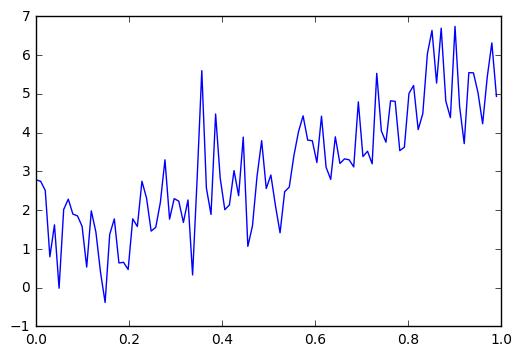

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats
%matplotlib inline

## Syntetyczny zbiór danych
np.random.seed(123456789)

def y(x,m,b,mu=0,sigma=1): 
    return m*x + b + np.random.normal(mu,sigma,1)[0]

N = 101
M = 2
t = np.empty(N)
domain_bound = 1.0/N
domain = np.empty(N)

for i in range(N): 
    domain[i] = i*domain_bound
    
for i in range(N): 
    t[i] = y(x=domain[i],m=4.89,b=0.57)

plt.plot(domain,t)



###LICZYMY LOG-LIKELIHOOD:
def loglikelihood(w, X, Y, phi=lambda x: [1, x], sigma=1.0):
    
    likelihood = 0
    
    for i in range(len(X)):
        phi_x = np.mat(phi(X[i]))
        predicted_mean = phi_x*np.mat(w).T
        likelihood += np.log(scipy.stats.norm.pdf(Y[i], predicted_mean, sigma))
    
    return likelihood[0][0]

print(loglikelihood([0.1,2], domain, t))

## Ćwiczenie 2 (1 pkt)

Napisać funkcję, która przyjmuje dwuwymiarową dodatnio określoną macierz $A$, a następnie:
1. Rysuje heatmap dla $v^TAv$.
2. Na tym samym wykresie:
    - rysuje okrąg jednostkowy,
    - rysuje elipsę jednostkową dla $A$,
    - rysuje elipsę jednostkową dla $A^{-1}$.

Jedyną trudność może sprawić narysowanie elipsy jednostkowej. Proponuję zrobić to w następujący sposób:
1. Zacząć od listy wektorów na okręgu jednostkowym - punkty postaci $(\cos(\alpha), \sin(\alpha))$, gdzie $\alpha$ są rozmieszczone równomiernie na odcinku $[0,2\pi)$.
2. Dla każdego wektora $v$ liczymy $\|v\|^2 = v^TAv$ - chcielibyśmy, żeby $\|v\| = 1$, więc w tym celu wystarczy zastąpić $v$ przez $\frac{v}{\sqrt{v^TAv}}$.
3. Mamy listę kolejnych punktów leżących na elipsie jednostkowej macierzy $A$, rysujemy je i łączymy odcinkami.

Oczywiście najwygodniej będzie stworzyć funkcję pomocniczą draw_ellipse, której podamy kolejno macierz identycznościową (aby uzyskać okrąg), macierz $A$ i $A^{-1}$.

Nie widzę zupełnie, dlaczego elipsy miałyby się przecinać na okręgu jednostkowym. Weźmy macierz [[1/n, 0][0,n]]. Jej elipsa jednostkowa nie ma punktów o współrzędnej x większej niż sqrt(1/n). Analogicznie elipsa macierzy odwrotnej dla współrzędnych y-owych. Dla odpowiednio dużego n nie ma na okręgu jednostkowym punktu, który ma obie współrządne mniejsze na moduł niż sqrt(1/n), a co za tym idzie elipsy nie mogą się się przecinać na okręgu jednostkowym. Można zobaczyć ten przykład po wykomentowaniu.


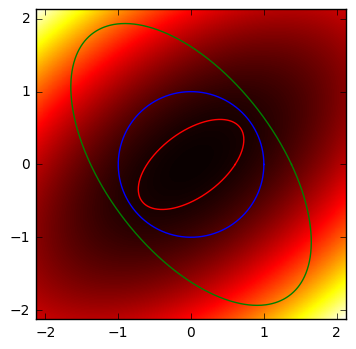

In [2]:
def draw_ellipse(A, size = 1000):
    args = np.linspace(0,2*np.pi, size)
    points = np.array([[np.cos(arg), np.sin(arg)] for arg in args])
    for i, point in enumerate(points):
        norm_sq = np.matrix(point) * A * np.matrix(point).T
        points[i] = points[i]/np.sqrt(norm_sq)
    plt.plot(points.T[0], points.T[1])
    return (max([max(point) for point in points]))

def cw_1(A, size = 1000):
    
    I = np.matrix([[1,0],[0,1]])  
    
    draw_ellipse(I)
    border = draw_ellipse(A)
    border = 1.1*max(border, draw_ellipse(np.linalg.inv(A)))
    
    
    heat = np.zeros((size, size))
    for row in range(size):
        for column in range(size):
            v = np.matrix([np.linspace(-border,border,size)[row], np.linspace(-border,border,size)[column]]).T
            heat[row, column] = v.T * A * v
    plt.imshow(heat, cmap='hot', interpolation='nearest', extent=[-border,border,-border,border])


            
  


A = np.random.rand(2,2)
cov = np.dot(A,A.transpose())

#cov = np.matrix([[100,0],[0,0.01]])

cw_1(cov)

# Spodziewany efekt - albo mała elipsa wewnątrz okręgu wewnątrz dużej elipsy,
# albo duża i mała elipsa przecinają się dokładnie na okręgu
print("Nie widzę zupełnie, dlaczego elipsy miałyby się przecinać na okręgu jednostkowym. Weźmy macierz [[1/n, 0][0,n]]. Jej elipsa jednostkowa nie ma punktów o współrzędnej x większej niż sqrt(1/n). Analogicznie elipsa macierzy odwrotnej dla współrzędnych y-owych. Dla odpowiednio dużego n nie ma na okręgu jednostkowym punktu, który ma obie współrządne mniejsze na moduł niż sqrt(1/n), a co za tym idzie elipsy nie mogą się się przecinać na okręgu jednostkowym. Można zobaczyć ten przykład po wykomentowaniu.")


## Ćwiczenie 2 (1 pkt)

Wylosować 1000 punktów z dwuwymiarowego rozkładu normalnego o losowej macierzy $\Sigma$. Następnie wyestymować kowariancje z próbki i porównać z macierzą kowariancji.

In [3]:
sample_size = 1000

A = np.random.rand(2,2)
cov = np.dot(A,A.transpose())
mean = np.random.uniform(-5,5,2)

samples = np.random.multivariate_normal(mean, cov, size=sample_size).T

est_mean = [np.mean(samples[0]), np.mean(samples[1])]
est_cov = np.zeros((2,2))
est_cov[0,0] = sum([(samples[0][i]-est_mean[0]) * (samples[0][i]-est_mean[0]) for i in range(sample_size)]) / (sample_size-1)
est_cov[1,1] = sum([(samples[1][i]-est_mean[1]) * (samples[1][i]-est_mean[1]) for i in range(sample_size)]) / (sample_size-1)
est_cov[1,0] = sum([(samples[0][i]-est_mean[0]) * (samples[1][i]-est_mean[1]) for i in range(sample_size)]) / (sample_size-1)
est_cov[0,1] = est_cov[1,0]

print(cov)
print(est_cov)

[[ 0.7394036   0.88887202]
 [ 0.88887202  1.15880164]]
[[ 0.72136692  0.85034293]
 [ 0.85034293  1.09187623]]


## Ćwiczenie 3 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Wylosować dwie serie po 1000 punktów z dwóch różnych jednowymiarowych rozkładów Gaussa. Narysować histogramy. Następnie umieścić wyniki w tabeli 1000 na 2 i narysować rozkład produktowy (zaznaczyć wylosowane pary punktów na płaszczyźnie).

In [4]:
n1 = np.random.normal(1,4, 1000)
n2 = np.random.normal(-2,1, 1000)

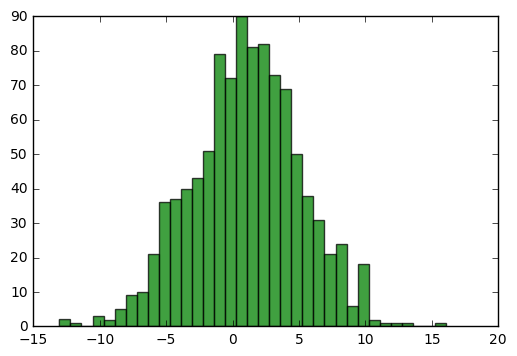

In [5]:
_ = plt.hist(n1, 35, facecolor='green', alpha=0.75)

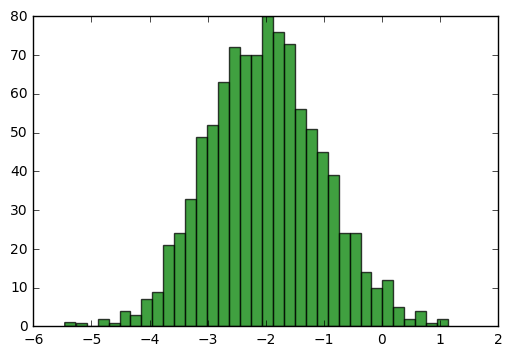

In [6]:
_ = plt.hist(n2, 35, facecolor='green', alpha=0.75)

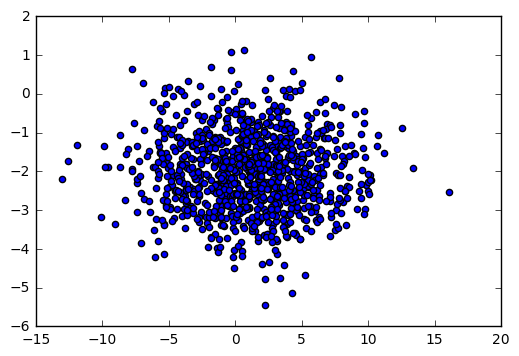

In [7]:
plt.scatter(n1, n2)

## Ćwiczenie 4 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Wziąć dane z poprzedniego ćwiczenia (tysiąc punktów na płaszczyźnie) i obrócić zbiór danych o kąt $\alpha$ (np. 43 stopnie) względem początku układu współrzędnych - w tym celu każdy wiersz tabeli z danymi należy przemnożyć przez macierz:
$$\begin{bmatrix}
    \cos(\alpha) & -\sin(\alpha) \\
    \sin(\alpha) & \cos(\alpha) \\
\end{bmatrix}$$

Narysować nowe punkty na płaszczyźnie.

Narysować histogramy rozkładów brzegowych (czyli wziąć pierwszą współrzędną wszystkich punktów i narysować dla niej histogram, potem analogicznie zrobić z drugą współrzędną). Sprawdzić (wizualnie), że rozkłady brzegowe są rozkładami Gaussa.

In [8]:
product = np.array([n1, n2]).T

def turn (alpha, point):
    return [point[0]*np.cos(alpha) - point[1]*np.sin(alpha), point[0]*np.sin(alpha) + point[1]*np.cos(alpha)]

product_45 = np.array([turn(np.pi/4, point) for point in product])
product_90 = np.array([turn(np.pi/2, point) for point in product])


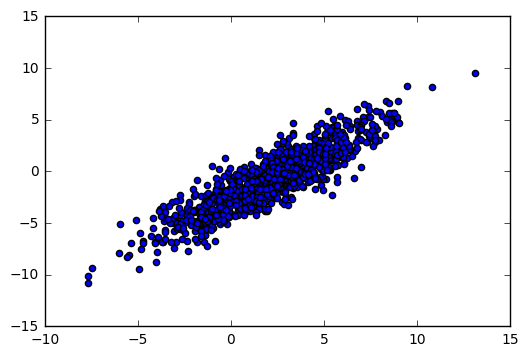

In [9]:
plt.scatter(product_45.T[0], product_45.T[1])

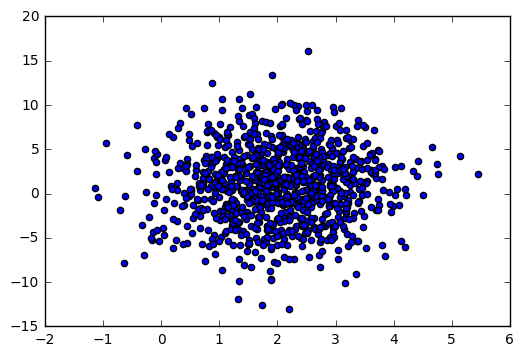

In [10]:
plt.scatter(product_90.T[0], product_90.T[1])

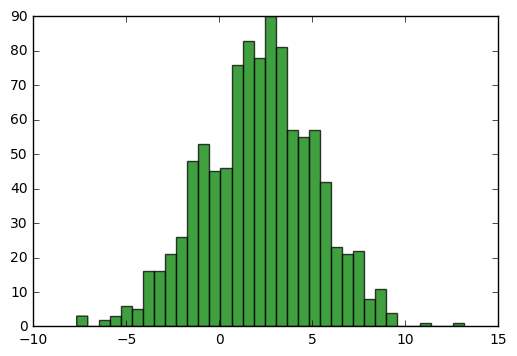

In [11]:
_ = plt.hist(product_45.T[0], 35, facecolor='green', alpha=0.75)

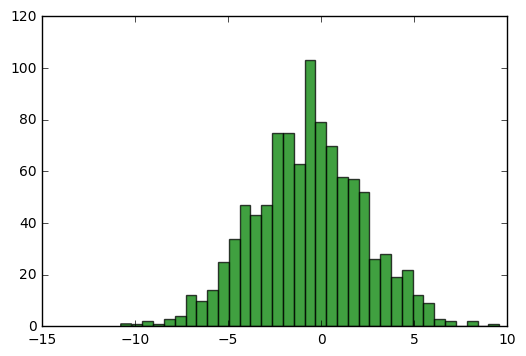

In [12]:
_ = plt.hist(product_45.T[1], 35, facecolor='green', alpha=0.75)

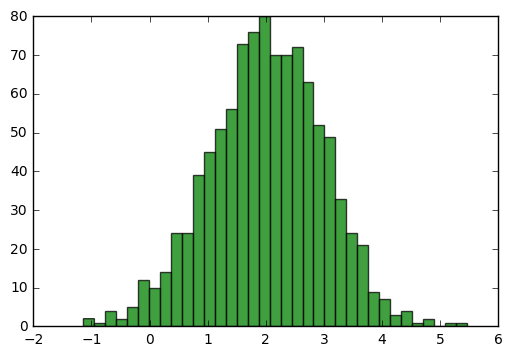

In [13]:
_ = plt.hist(product_90.T[0], 35, facecolor='green', alpha=0.75)

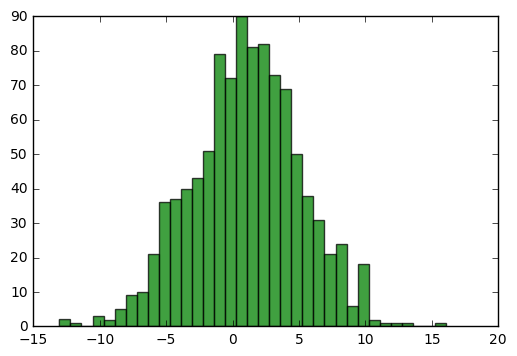

In [14]:
_ = plt.hist(product_90.T[1], 35, facecolor='green', alpha=0.75)

Otrzymujemy po prostu wykres obrócony o 90 stopni.

## Ćwiczenie 5 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Powtórzyć dwa poprzednie ćwiczenia, ale na początku wylosować po 1000 punktów z dwóch różnych rozkładów jednostajnych (pierwszy na odcinku $[a, b]$, drugi na odcinku $[c, d]$). Sprawdzić, że po obrocie rozkład brzegowy nie jest jednostajny.

In [15]:
u1 = np.random.uniform(1,4, 1000)
u2 = np.random.uniform(-2,1, 1000)

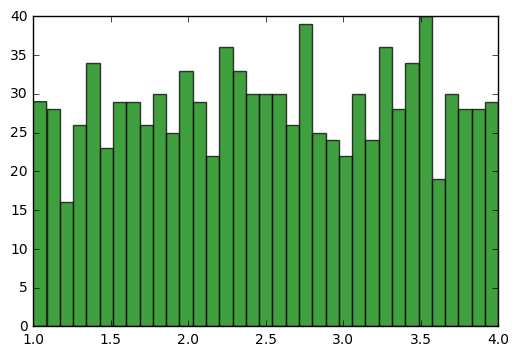

In [16]:
_ = plt.hist(u1, 35, facecolor='green', alpha=0.75)

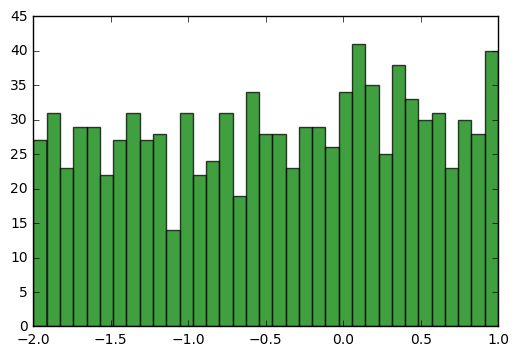

In [17]:
_ = plt.hist(u2, 35, facecolor='green', alpha=0.75)

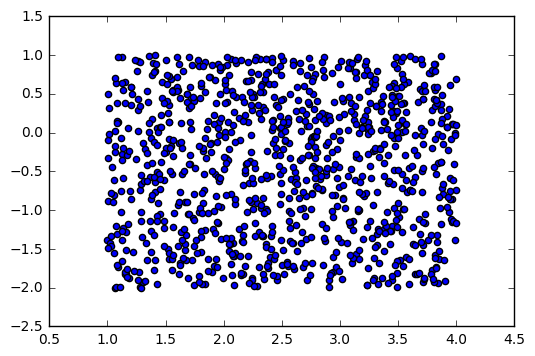

In [18]:
plt.scatter(u1, u2)

In [19]:
product = np.array([u1, u2]).T
product_30 = np.array([turn(np.pi/6, point) for point in product])

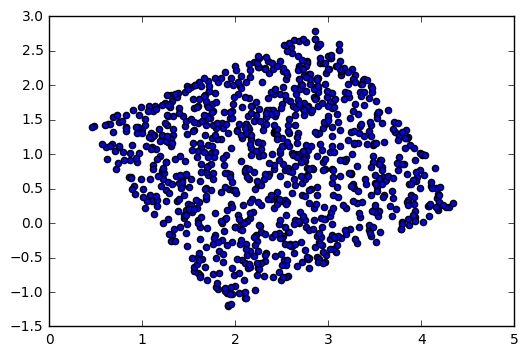

In [20]:
plt.scatter(product_30.T[0], product_30.T[1])

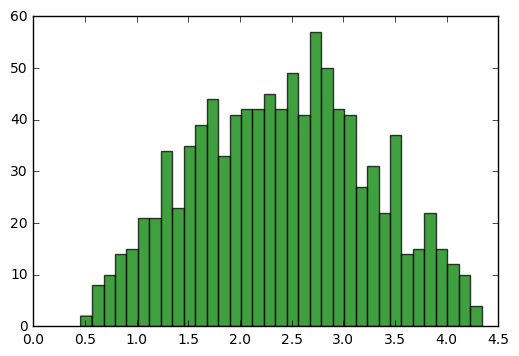

In [21]:
_ = plt.hist(product_30.T[0], 35, facecolor='green', alpha=0.75)

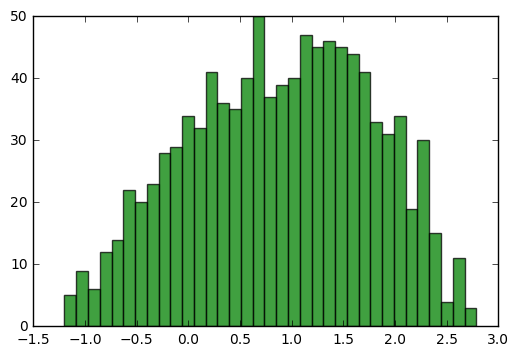

In [22]:
_ = plt.hist(product_30.T[1], 35, facecolor='green', alpha=0.75)

## Ćwiczenie 6 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Wykorzystać dwie serie danych z ćwiczenia 2. w celu udowodnienia powyższej uwagi - stworzyć odpowiednią trzecią serię danych (jaką?) i narysować jej histogram. Sprawdzić wizualnie, że jest to rozkład Gaussa.

Powtórzyć dla serii danych z rozkładu jednostajnego (ćwiczenie 4.), przekonać się, że suma rozkładów jednostajnych nie jest rozkładem jednostajnym. 

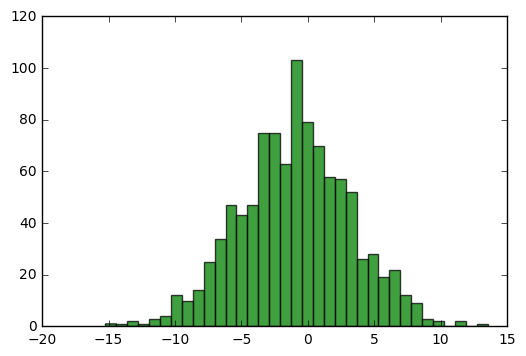

In [23]:
n3 = n1 + n2
_ = plt.hist(n3, 35, facecolor='green', alpha=0.75)

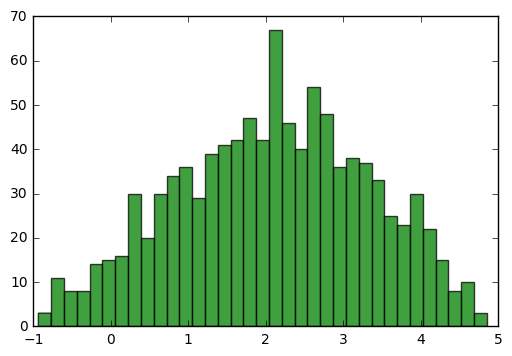

In [24]:
u3 = u1+u2

_ = plt.hist(u3, 35, facecolor='green', alpha=0.75)

## Ćwiczenie 7 (1 pkt)

"Udowodnić" powyższe twierdzenie w następujący sposób:
1. Wylosować $k$ serii po 1000 punktów z rozkładu jednostajnego na odcinku $[0,1]$.
2. Zsumować te rozkłady.
3. Narysować histogramy sumy np. dla $k = 1, 2, 3, 5, 10$.
4. (Dla odważnych) Zamiast sumy zastosować poprawny wzór z Wikipedii (od każdego rozkładu odjąć średnią, uśrednić arytmetycznie zamiast sumować, przypomnieć sobie wzór na $\sigma$ rozkładu jednostajnego na odcinku, podzielić przez $\frac{\sigma}{\sqrt{n}}$).

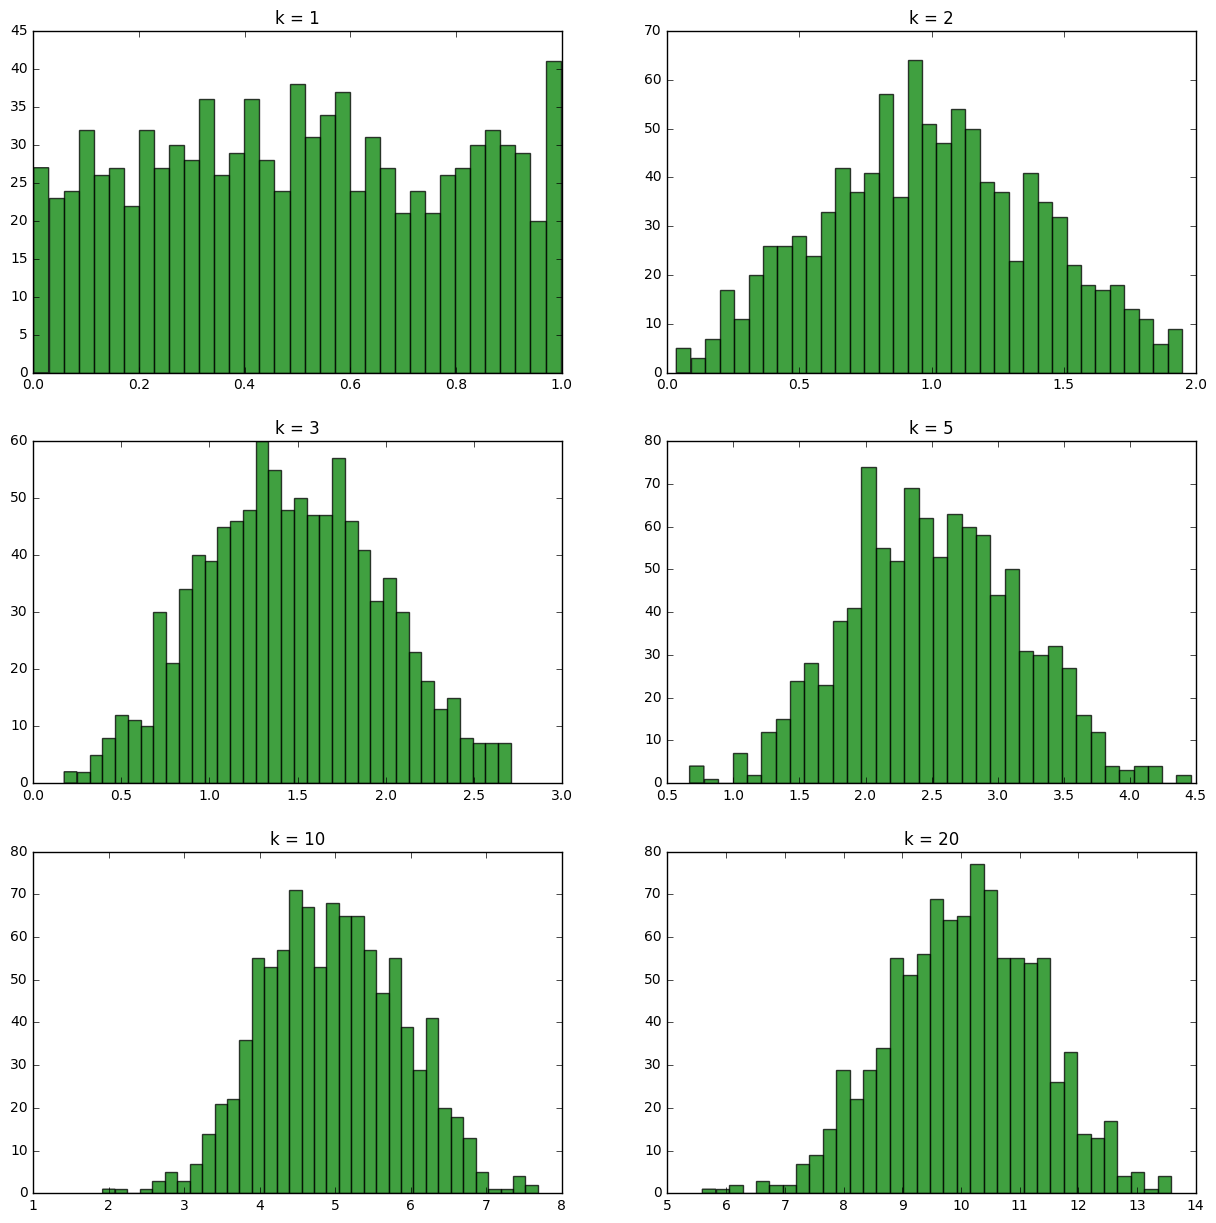

In [25]:
elements = [1,2,3,5,10,20]
plt.figure(figsize = (15,15))
for i in range(1,7):
    plt.subplot(3,2,i)
    plt.title("k = {0}".format(elements[i-1]))
    distribution = np.random.uniform(0,1,1000)
    for j in range(elements[i-1]-1):
        distribution += np.random.uniform(0,1,1000)
    _ = plt.hist(distribution, 35, facecolor='green', alpha=0.75)